### Will a Customer Accept the Coupon?

**Student**: Eugene Pakhomov

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/Users/peugene/Library/CloudStorage/OneDrive-Synopsys,Inc/Documents/study/Berkeley/Module5/assignment_5_1_starter/data/coupons.csv')

In [3]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


In [4]:
#let's fix an error in a column's name
data = data.rename({'passanger':'passenger'}, axis='columns')

In [5]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
#getting a sense of the values
data.agg(['unique']).T

,unique
destination,"[No Urgent Place, Home, Work]"
passenger,"[Alone, Friend(s), Kid(s), Partner]"
weather,"[Sunny, Rainy, Snowy]"
temperature,"[55, 80, 30]"
time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
expiration,"[1d, 2h]"
gender,"[Female, Male]"
age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
maritalStatus,"[Unmarried partner, Single, Married partner, D..."


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isna().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#The car column has almost no values and it makes sense to drop it
data = data.drop('car', axis=1)
assert data.shape[1] == 25

In [9]:
#Dropping duplicate rows and checking that there are no duplicates after
data=data.drop_duplicates()
assert data.duplicated().sum() == 0

In [10]:
#Filling missing values with most common values in the respective column
cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols] = data[cols].apply(lambda x: x.fillna(x.mode()[0]))
assert data.isna().agg(sum).sum() == 0

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
#Calculating the proportion
propY = data.query('Y == 1').shape[0]/data.Y.shape[0]*100
print('Proportion of the total observations chose to accept the coupon, %: ')
round(propY, 2)

Proportion of the total observations chose to accept the coupon, %: 


56.76

5. Use a bar plot to visualize the `coupon` column.

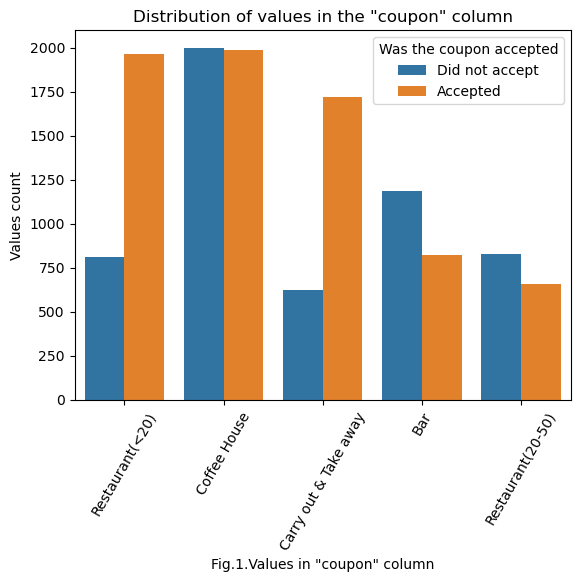

In [54]:
sns.countplot(data, x="coupon", hue='Y').set_title('Distribution of values in the "coupon" column')
plt.xticks(rotation=60)
plt.xlabel('Fig.1.Values in "coupon" column')
plt.ylabel("Values count")
plt.legend(title='Was the coupon accepted', labels=['Did not accept', 'Accepted'])
plt.savefig('coupon.png')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Values count')

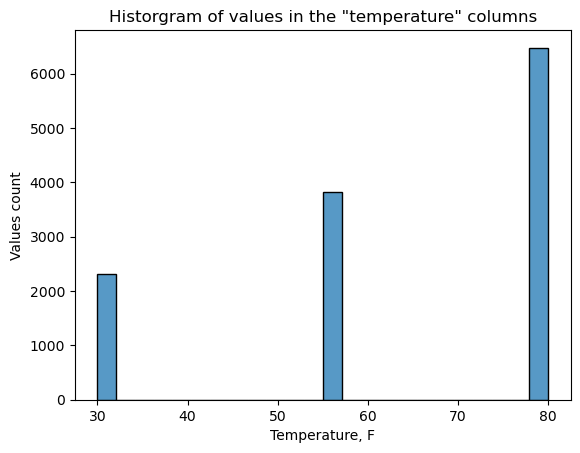

In [13]:
sns.histplot(data.temperature).set_title('Historgram of values in the "temperature" columns')
plt.xlabel("Temperature, F")
plt.ylabel("Values count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [56]:
coupon_bar_df = data.query('coupon=="Bar"').reset_index(drop=True)

2. What proportion of bar coupons were accepted?


In [15]:
#calculating and rounding the proportion
propYB = (coupon_bar_df.Y == 1).sum()/coupon_bar_df.Y.count()*100
print('Proportion of the accepted bar coupons, %: ')
round(propYB, 2)

Proportion of the accepted bar coupons, %: 


41.0

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
#Calculating the rates
less_bar = coupon_bar_df.query('Bar ==["1~3", "less1", "never"]')
more_bar = coupon_bar_df.query('Bar ==["4~8", "gt8"]') 

In [17]:
print("Aceptance rate for those who went to a bar 3 or fewer times:", 
      round(less_bar.query('Y == 1').shape[0]/less_bar.shape[0],2))
print("Aceptance rate for those who went more:",
      round(more_bar.query('Y == 1').shape[0]/more_bar.shape[0],2))

Aceptance rate for those who went to a bar 3 or fewer times: 0.37
Aceptance rate for those who went more: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
#Calculating the rates
once_25 = coupon_bar_df.query('Bar ==["1~3", "4~8", "gt8"] & age == ["26", "31", "50plus", "36", "46", "41"]')
#Creating the other dataframe by concatenating two existing dataframe and dropping duplicates 
others = pd.concat([coupon_bar_df,once_25]).drop_duplicates(keep=False)
#Checking that all dataframes add up
assert coupon_bar_df.shape[0] == once_25.shape[0] + others.shape[0]

In [19]:
print("Aceptance rate for those who go to a bar more than once a month and are over the age of 25:", 
      round(once_25.query('Y == 1').shape[0]/once_25.shape[0],2))
print("Aceptance rate for all the others:",
      round(others.query('Y == 1').shape[0]/others.shape[0],2))

Aceptance rate for those who go to a bar more than once a month and are over the age of 25: 0.7
Aceptance rate for all the others: 0.33


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [20]:
once_month_no_kid = coupon_bar_df.query('Bar ==["1~3", "4~8", "gt8"] & passenger != "Kid(s)" & occupation !="Farming Fishing & Forestry"')
others2 = pd.concat([coupon_bar_df,once_month_no_kid]).drop_duplicates(keep=False)
assert coupon_bar_df.shape[0] == once_month_no_kid.shape[0] + others2.shape[0]

In [21]:
print('''Aceptance rate for those who go to a bar more than once a month and had passengers that were not 
a kid and had occupations other than farming, fishing, or forestry:"''', 
      round(once_month_no_kid.query('Y == 1').shape[0]/once_month_no_kid.shape[0],2))
print("Aceptance rate for all the others:",
      round(others2.query('Y == 1').shape[0]/others2.shape[0],2))

Aceptance rate for those who go to a bar more than once a month and had passengers that were not 
a kid and had occupations other than farming, fishing, or forestry:" 0.71
Aceptance rate for all the others: 0.3


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [22]:
no_kid_no_wid = coupon_bar_df.query('Bar ==["1~3", "4~8", "gt8"] & passenger != "Kid(s)" & maritalStatus !="Widowed"')
under_30 = coupon_bar_df.query('Bar ==["1~3", "4~8", "gt8"] & age == ["below21", "21", "26"]')
cheap = coupon_bar_df.query('RestaurantLessThan20 ==["4~8", "gt8"] & income == ["$37500 - $49999", "$25000 - $37499", "Less than $12500"]')

In [23]:
print('''Aceptance rate for those who go to bars more than once a month, had passengers that were not a kid, 
and were not widowed:''',
      round(no_kid_no_wid.query('Y == 1').shape[0]/no_kid_no_wid.shape[0], 2))

print('''Aceptance rate for those who go to bars more than once a month and are under the age of 30:''',
      round(under_30.query('Y == 1').shape[0]/under_30.shape[0], 2))

print('''Aceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K:''',
      round(cheap.query('Y == 1').shape[0]/cheap.shape[0], 2))

Aceptance rate for those who go to bars more than once a month, had passengers that were not a kid, 
and were not widowed: 0.71
Aceptance rate for those who go to bars more than once a month and are under the age of 30: 0.72
Aceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.46


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers are more likely to accept the coupons if they are:

- Go to a bar often, at least once a month
- Are over the age of 25 and older
- Have passengers that were not a kid
- Not involved in farming, fishing, or forestry industry

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Businesses are interested in customers with high income, becuase they likely to spend more money and increase the revenue. The objective of this part is to understand attributes of drivers with high income who would likely accept a coupon. Let's create a new group (let's call it 5A) for drivers with income 87500−99999 USD and 100000 USD or more.

In [24]:
high_income = data.query('income ==["$87500 - $99999", "$100000 or More"]').reset_index(drop=True)

<p>Not every driver with high income is equal. Let's find which kind of coupons they prefer.</p>

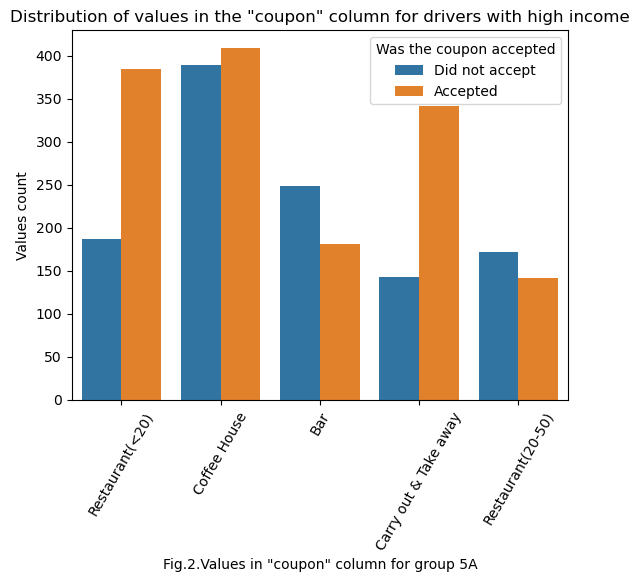

In [61]:
sns.countplot(high_income, x="coupon", hue='Y').set_title('Distribution of values in the "coupon" column for drivers with high income')
plt.xticks(rotation=60)
plt.xlabel('Fig.2.Values in "coupon" column for group 5A')
plt.ylabel("Values count")
plt.legend(title='Was the coupon accepted', labels=['Did not accept', 'Accepted'])
plt.savefig('coupon2.png')

As we can see, three coupon types stand out: "Restaurant(<20)", "Carry out & Take away" and "Coffe house". It's interesting also to note that drivers with high income were less likely to accept "Bar" and "Restaurant(20-50)" coupons. So with this data in mind, let's take even closer look at drivers with high income who likely to accept "Restaurant(<20)", "Carry out & Take away" and "Coffe house" coupons.

In [62]:
high_income_coupons=high_income.query('coupon ==["Restaurant(<20)", "Carry out & Take away", "Coffee House"]').reset_index(drop=True)

<p>So now, we can research other dependencies we can find for this group. In order to get a better picture, let's subplot all other attributes. Please note that I removed the legend and labels on purpose, becuse otherwise sublopts would seem very busy.</p>

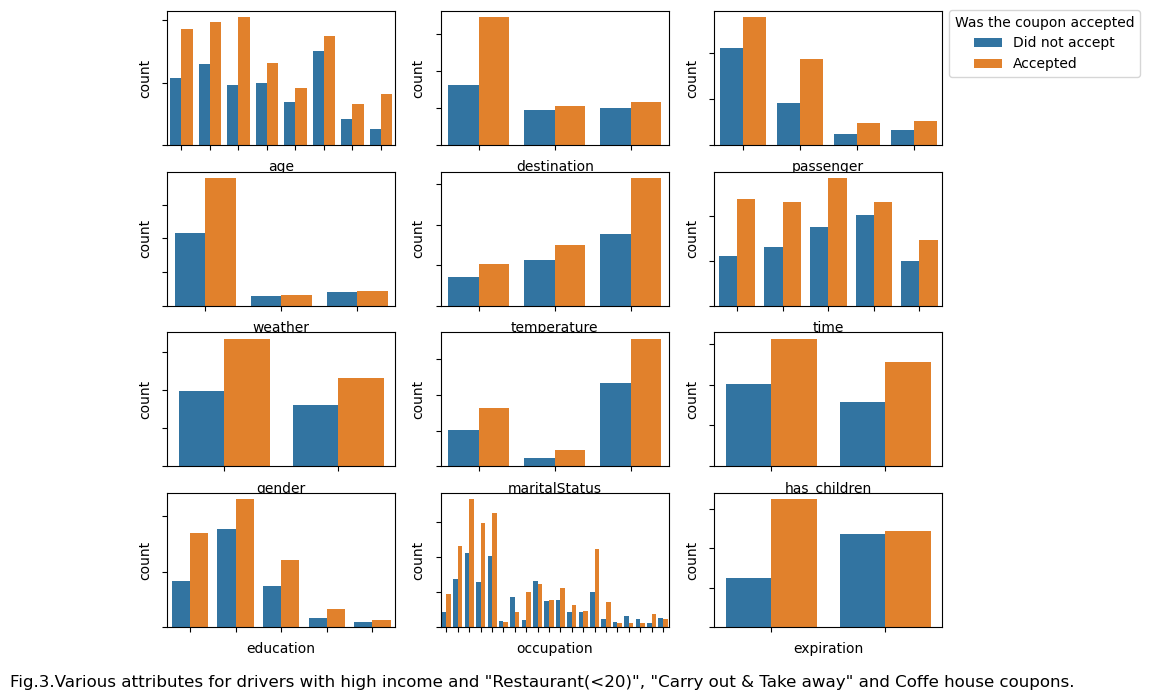

In [86]:
f, axes = plt.subplots(4, 3, figsize=(10, 8))
sns.countplot(hue="Y", x= "age", data=high_income_coupons,  orient='v' , ax=axes[0, 0])
sns.countplot(hue="Y", x= "destination", data=high_income_coupons,  orient='v' , ax=axes[0, 1])
sns.countplot(hue="Y", x= "passenger", data=high_income_coupons,  orient='v' , ax=axes[0, 2])
sns.countplot(hue="Y", x= "weather", data=high_income_coupons,  orient='v' , ax=axes[1, 0])
sns.countplot(hue="Y", x= "temperature", data=high_income_coupons,  orient='v' , ax=axes[1, 1])
sns.countplot(hue="Y", x= "time", data=high_income_coupons,  orient='v' , ax=axes[1, 2])
sns.countplot(hue="Y", x= "gender", data=high_income_coupons,  orient='v' , ax=axes[2, 0])
sns.countplot(hue="Y", x= "maritalStatus", data=high_income_coupons,  orient='v' , ax=axes[2, 1])
sns.countplot(hue="Y", x= "has_children", data=high_income_coupons,  orient='v' , ax=axes[2, 2])
sns.countplot(hue="Y", x= "education", data=high_income_coupons,  orient='v' , ax=axes[3, 0])
sns.countplot(hue="Y", x= "occupation", data=high_income_coupons,  orient='v' , ax=axes[3, 1])
sns.countplot(hue="Y", x= "expiration", data=high_income_coupons,  orient='v' , ax=axes[3, 2])
f.suptitle('Fig.3.Various attributes for drivers with high income and "Restaurant(<20)", "Carry out & Take away" and Coffe house coupons.', y=.05)
for i, axes in enumerate(f.axes): 
     axes.get_legend().remove()
     axes.set(xticklabels=[])
     axes.set(yticklabels=[])
plt.legend(title='Was the coupon accepted', labels=['Did not accept', 'Accepted'])
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 4.66))
plt.savefig('coupon3.png')

<p>Looking at these plots, we notice the following attributes stand out stronger than the most: weather, expiration, marital status, destination. With that in mind, let's verify this observation by calculating an acceptance rate between single drivers observed in sunny weather with no urgent place to go and that were given coupons expiring in one day. Let's compare this acceptance rate with an acceptance rate for everybody else.</p>

In [87]:
sunny = high_income_coupons.query('weather =="Sunny" & expiration =="1d" & maritalStatus=="Single" & destination=="No Urgent Place"')
others4 = pd.concat([high_income_coupons,sunny]).drop_duplicates(keep=False)
assert high_income_coupons.shape[0] == others4.shape[0] + sunny.shape[0]

In [90]:
print('''Aceptance rate for single drivers observed in sunny weather with no urgent place to go 
and that were given coupons expiring in one day:''',
      round(sunny.query('Y == 1').shape[0]/sunny.shape[0], 2))

print('Aceptance rate for everybody else:',round(others4.query('Y == 1').shape[0]/others4.shape[0], 2))

Aceptance rate for single drivers observed in sunny weather with no urgent place to go 
and that were given coupons expiring in one day: 0.81
Aceptance rate for everybody else: 0.6


<h2>Discussion</h2>

Both Groups have good acceptance rates which proves that any driver with high income is likely to accept "Restaurant(<20)", "Carry out & Take away" and "Coffee house" coupons. However, out of all drivers with high income, the biggest acceptance rate was detected in the group of single drivers observed in sunny weather with no urgent place to go and that were given coupons expiring in one day.

Thus, business with the modest budget for coupon promotions should target this group of drivers first. Some social media companies, like Meta for example, can target users with these specific attributes.

<h2>Next steps and recommendations</h2>

- For users with high income, we can even further research specific attributes like occupation, direction, education, children, etc.
- We can also conduct the similar analysis for business involved in only one segment, like Bars only as we did in the Part 1. We could similarly research other segments (Cheap restaurants, coffee houses, et.).
- Given the technical means that allow businesses to target any attributes of drivers, it would be great to develop a system that would automatically calculate coupon acceptance rates given the input about target audience. 